In [74]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# importing all the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,r2_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [76]:
#Loading Data Set
pv=pd.read_csv("zoo.csv")

In [77]:
pv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [78]:
pv.describe(include="all")

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
unique,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,frog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,NaN,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000


In [79]:
pv.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [80]:
import missingno as msno

<Axes: >

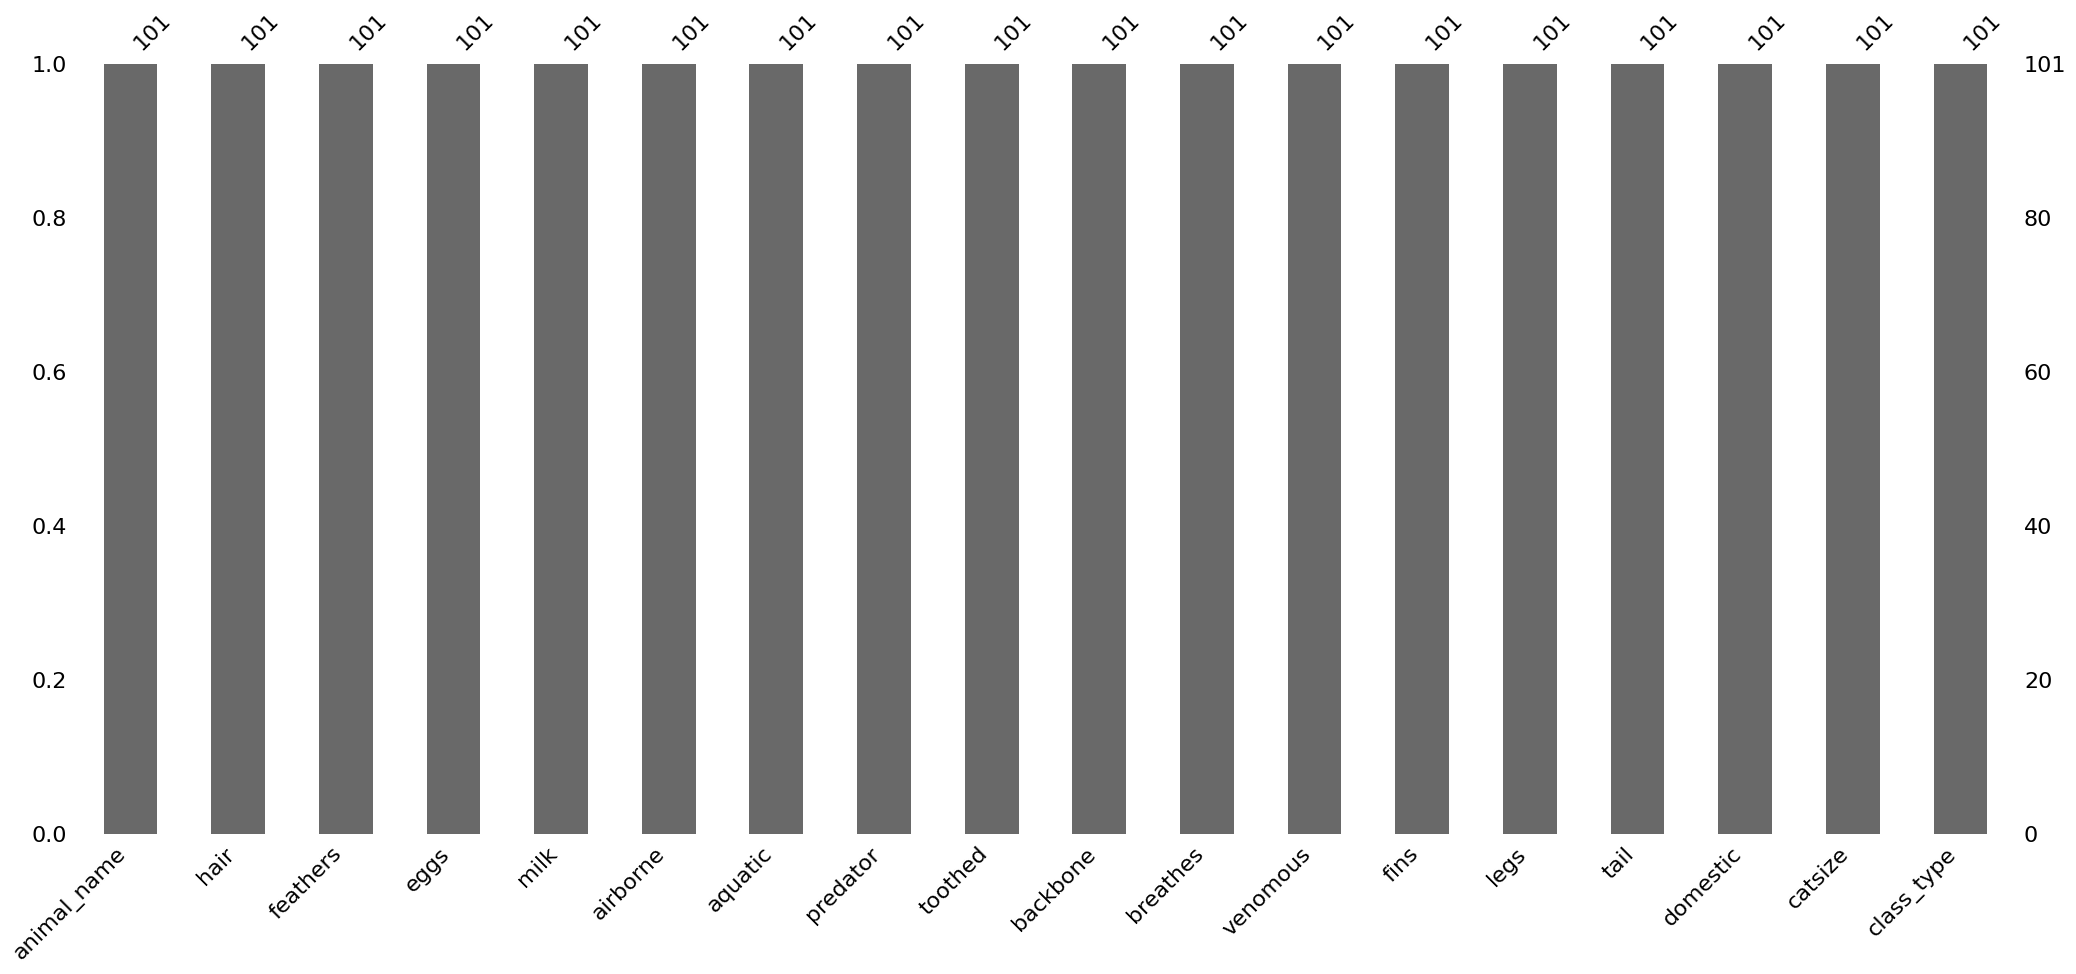

In [81]:
msno.bar(pv)

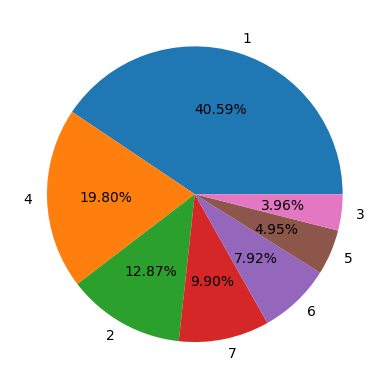

In [82]:
a=list(pv["class_type"].unique())
b=list(pv["class_type"].value_counts())
plt.pie(b,labels=a,autopct="%1.2f%%")
plt.show()

Pie chart shows the class type with respect to the number of animals belongs to them.

<Axes: xlabel='catsize'>

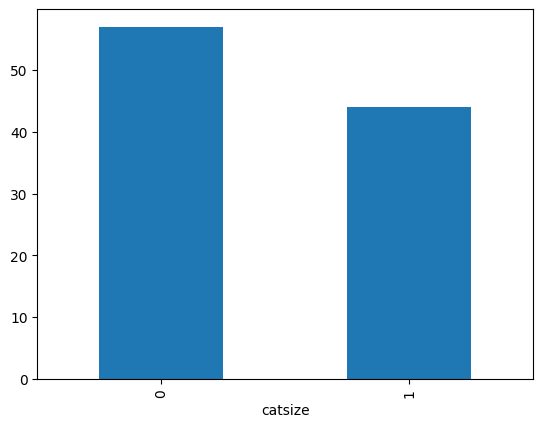

In [83]:
pv["catsize"].value_counts().plot.bar()

Cat-sized animals are not as many as Non cat-sized animals.


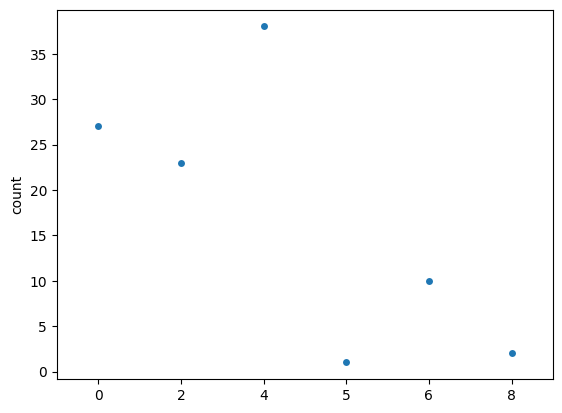

In [84]:
c=pv["legs"].unique()
d=pv["legs"].value_counts()
sns.swarmplot(x=c, y=d) # Pass the variables directly
plt.show()

Animals that has four legs are the most.

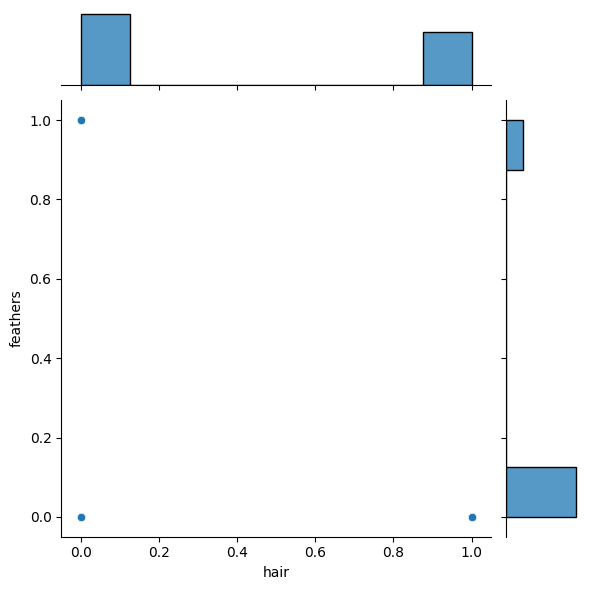

In [85]:
sns.jointplot(x="hair",y="feathers",data=pv,palette="Set2")
plt.show()

Joint plot implicates feathered animals are higher than haired  animals.

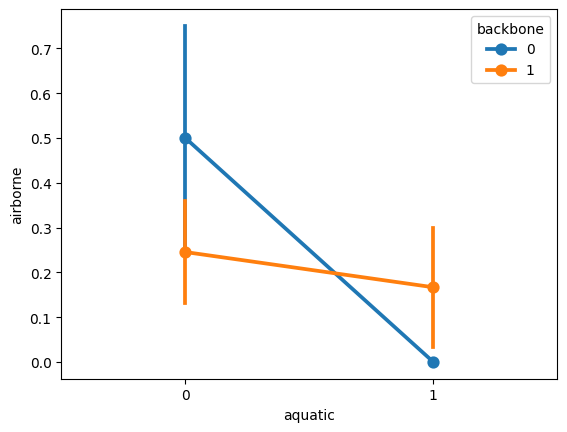

In [86]:

sns.pointplot(x="aquatic",y="airborne",hue="backbone",data=pv)
plt.show()

As per the following graph,we get to know that aquatic animals are with backbones than airbone animals.

In [87]:
#encoding the categorical columns into numerical.
!pip install category_encoders
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['animal_name'])
pv = encoder.fit_transform(pv)
pv


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


<Axes: >

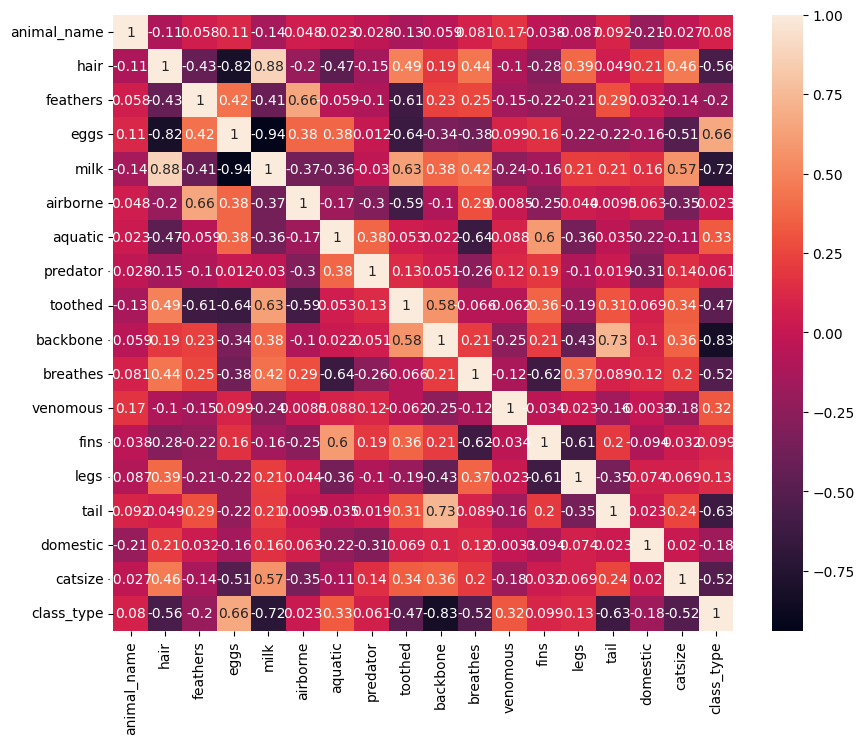

In [88]:
#finding correlation and plotting heat map.
t = pv.corr()
fig = plt.figure(figsize = (10,8))
sns.heatmap(t,annot = True)

# Decision Tree

In [89]:
from sklearn.model_selection import train_test_split
# Double-check the shape of your data and labels after splitting
x_Train, x_Test, y_Train, y_Test = train_test_split(
    pv.drop(columns=["class_type"]),
    pv[["class_type"]],
    test_size=0.4,
    random_state=2
)
print("Shape of x_Train:", x_Train.shape)
print("Shape of y_Train:", y_Train.shape)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=2)
classifier.fit(x_Train, y_Train)
y_pred=classifier.predict(x_Test)
y_pred
x_pred=classifier.predict(x_Train)
x_pred
from sklearn.metrics import accuracy_score
print("Decision Tree Testing Accuracy:",accuracy_score(y_Test,y_pred))
print("Decision Tree Training Accuracy:",accuracy_score(x_pred,y_Train))

Shape of x_Train: (60, 17)
Shape of y_Train: (60, 1)
Decision Tree Testing Accuracy: 0.7317073170731707
Decision Tree Training Accuracy: 0.6833333333333333


## Logistic Regression

In [99]:
x_Train, x_Test, y_Train, y_Test = train_test_split(
    pv.drop(columns=["class_type"]),
    pv[["class_type"]],
    test_size=0.3,
    random_state=0
)
print("Shape of x_Train:", x_Train.shape)
print("Shape of y_Train:", y_Train.shape)
classifier=LogisticRegression()
classifier.fit(x_Train,y_Train)
y_pred=classifier.predict(x_Test)

print("Logistic Regression Testing Accuracy:",accuracy_score(y_Test,y_pred)*100)

Shape of x_Train: (70, 17)
Shape of y_Train: (70, 1)
Logistic Regression Testing Accuracy: 96.7741935483871


In [101]:
cm=confusion_matrix(y_Test,y_pred)
cm

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  2]])

<Axes: >

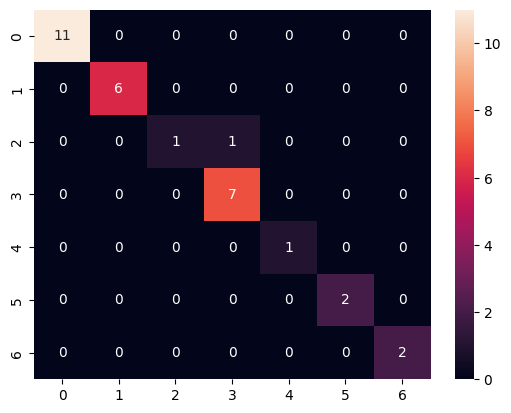

In [102]:
cm=confusion_matrix(y_Test,y_pred)
sns.heatmap(data = cm,annot = True)

In [103]:
print("Mean absolute error: %.2f "% mean_absolute_error(y_Test,y_pred))
print("Mean squared error: %.2f "% mean_squared_error(y_Test,y_pred))
print("Root mean squared error: %.2f "% np.sqrt(mean_squared_error(y_Test,y_pred)))
print("R square: %.2f"% r2_score(y_Test,y_pred))

Mean absolute error: 0.03 
Mean squared error: 0.03 
Root mean squared error: 0.18 
R square: 0.99


In [104]:
print(classification_report(y_Test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.98      0.93      0.94        31
weighted avg       0.97      0.97      0.96        31



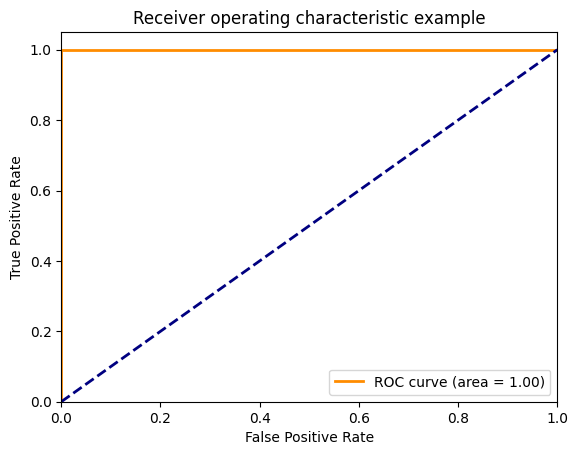

In [105]:
# Assuming 'y_Test' and 'y_pred' are multiclass
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_test_bin = label_binarize(y_Test, classes=np.unique(y_Test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_Test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class (example for class 0)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# ADA BOOST

In [106]:
#performing adaboosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
ada_base=AdaBoostClassifier(learning_rate=0.7,n_estimators=20,random_state=10)
ada_base.fit(x_Train,y_Train)
train_ada_base_pred=ada_base.predict(x_Train)
test_ada_base_pred=ada_base.predict(x_Test)
train_ada_base_prob=ada_base.predict_proba(x_Train)
test_ada_base_prob=ada_base.predict_proba(x_Test)
# train_ada_base_pred=ada_base.predict(y_train)
# train_ada_base_prob=ada_base.predict_proba(y_train)
# test_ada_base_pred=ada_base.predict(y_test)
# test_ada_base_prob=ada_base.predict_proba(y_test)
print("Training Accuracy:",accuracy_score(y_Train,train_ada_base_pred)*100)
print("Testing Accuracy:",accuracy_score(y_Test,test_ada_base_pred)*100)

Training Accuracy: 95.71428571428572
Testing Accuracy: 93.54838709677419


# Random Forest

In [107]:
from sklearn.model_selection import train_test_split
# Double-check the shape of your data and labels after splitting
x_Train, x_Test, y_Train, y_Test = train_test_split(
    pv.drop(columns=["class_type"]),
    pv[["class_type"]],
    test_size=0.4,
    random_state=0
)
print("Shape of x_Train:", x_Train.shape)
print("Shape of y_Train:", y_Train.shape)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3,max_leaf_nodes=4)
rfc.fit(x_Train, y_Train)
rfc.fit(x_Train, y_Train)
y_pred=rfc.predict(x_Test)
y_pred
x_pred=rfc.predict(x_Train)
x_pred
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_Test,y_pred))
print("Accuracy:",accuracy_score(x_pred,y_Train))


Shape of x_Train: (60, 17)
Shape of y_Train: (60, 1)
Accuracy: 0.8292682926829268
Accuracy: 0.9


# Gradient Boosting

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a GradientBoostingClassifier object
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                               max_depth=1, random_state=0)
clf.fit(x_Train, y_Train)
train_clf_pred=clf.predict(x_Train)
test_clf_pred=clf.predict(x_Test)
train_clf_prob=clf.predict_proba(x_Train)
test_clf_prob=clf.predict_proba(x_Test)

# Predict the labels for the test data
y_pred = clf.predict(x_Test)

# Print the accuracy score
print("Accuracy score:",accuracy_score(y_Train,train_clf_pred))
print("Accuracy score:", accuracy_score(y_Test, y_pred))



Accuracy score: 0.95
Accuracy score: 0.9024390243902439


In [112]:
train_acc=[0.6833333333333333,0.95,0.8292682926829268]
test_acc=[0.7317073170731707,0.967741935483871,0.9]
models=['Decision Tree','Logistic Regression','Random Forest']
pv=pd.DataFrame(list(zip(models,train_acc,test_acc)),columns=['Model','Train Accuracy','Test Accuracy'])
pv

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.683333,0.731707
1,Logistic Regression,0.950000,0.967742
2,Random Forest,0.829268,0.900000


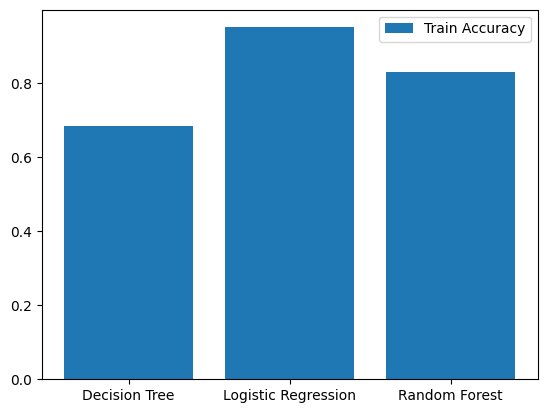

In [113]:
plt.bar(pv['Model'],pv['Train Accuracy'],label='Train Accuracy')
plt.legend()
plt.show()

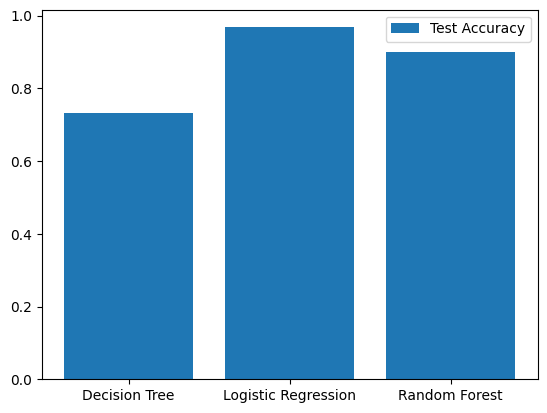

In [114]:
plt.bar(pv['Model'],pv['Test Accuracy'],label='Test Accuracy')
plt.legend()
plt.show()

# Key Insights from EDA and ML Analysis:
## Animal Classification Patterns:

Mammals are the most represented class in the zoo, followed by birds and aquatic animals.
Animals that has four legs are the most.

## Model Performance and Key Predictors:

Logistic Regression  model achieved 96% accuracy in classifying animals into their respective classes.
Key predictors: Number of legs,predators and backbone.
Unique characteristics like having feathers, scales, or fur significantly influence classification.

## Conservation and Management Recommendations:

Enhance breeding programs for endangered species identified through the model.
Allocate resources for habitat maintenance based on the population size and specific needs of animal classes.